In [7]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as  np
import matplotlib.cm as cm

In [3]:
X,y=make_blobs(n_samples=500,centers=4,n_features=2,random_state=1,shuffle=True)

In [8]:
X

array([[-6.92324165e+00, -1.06695320e+01],
       [-8.63062033e+00, -7.13940564e+00],
       [-9.63048069e+00, -2.72044935e+00],
       [-2.30647659e+00,  5.30797676e+00],
       [-7.57005366e+00, -3.01446491e+00],
       [-1.00051011e+00,  2.77905153e+00],
       [-4.81826839e+00, -2.77214822e+00],
       [-5.33964799e+00, -1.27625764e+00],
       [-7.94308840e+00, -3.89993901e+00],
       [-5.54924525e+00, -3.41298968e+00],
       [-5.14508990e+00, -9.54492198e+00],
       [-7.09669936e+00, -8.04074036e+00],
       [-5.82641512e+00, -1.96346196e+00],
       [-1.83198811e+00,  3.52863145e+00],
       [-7.34267235e+00, -3.16546482e+00],
       [-7.34072825e+00, -6.92427252e+00],
       [-7.94653906e+00, -3.36768655e+00],
       [-8.24598536e+00, -8.61315821e+00],
       [-1.98197711e+00,  4.02243551e+00],
       [-4.35098035e+00, -3.69476678e+00],
       [-1.04768696e+01, -3.60318139e+00],
       [-1.10195984e+01, -3.15882031e+00],
       [-5.17255904e+00, -4.31835971e+00],
       [-2.

In [4]:
y

array([2, 2, 1, 0, 3, 0, 3, 3, 1, 3, 2, 2, 3, 0, 3, 2, 1, 2, 0, 3, 1, 1,
       3, 0, 3, 3, 0, 0, 1, 3, 2, 0, 3, 2, 3, 2, 1, 1, 2, 1, 3, 1, 0, 3,
       3, 2, 1, 3, 0, 0, 0, 1, 1, 3, 2, 1, 1, 1, 1, 3, 0, 0, 1, 3, 0, 3,
       2, 3, 1, 1, 2, 1, 3, 2, 3, 3, 2, 3, 3, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 2, 1, 3, 0, 2, 2, 3, 2, 0, 0, 2, 0, 1, 0, 3, 3, 0, 0, 1,
       3, 2, 0, 1, 0, 1, 0, 3, 0, 3, 1, 2, 2, 1, 3, 1, 0, 2, 2, 3, 0, 1,
       1, 1, 1, 2, 0, 3, 0, 0, 3, 2, 3, 0, 0, 0, 3, 3, 2, 2, 1, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 3, 0, 2, 1, 3, 2, 0, 1,
       1, 1, 1, 2, 3, 1, 0, 2, 2, 1, 3, 2, 2, 3, 0, 0, 2, 2, 3, 0, 3, 2,
       2, 0, 2, 1, 0, 3, 3, 2, 3, 1, 2, 3, 1, 3, 1, 2, 3, 3, 3, 0, 1, 0,
       3, 2, 1, 3, 1, 1, 1, 0, 3, 0, 2, 1, 2, 1, 0, 0, 1, 2, 0, 2, 3, 1,
       2, 2, 2, 2, 3, 1, 2, 1, 3, 0, 0, 3, 3, 0, 1, 3, 1, 0, 3, 0, 1, 1,
       0, 3, 2, 2, 1, 1, 1, 3, 0, 0, 3, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 0,
       0, 3, 1, 1, 1, 3, 3, 3, 2, 0, 2, 1, 2, 3, 2,

c:\Users\mehsa\anaconda3\envs\nlp\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\mehsa\anaconda3\envs\nlp\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\mehsa\anaconda3\envs\nlp\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\mehsa\anaconda3\envs\nlp\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is k

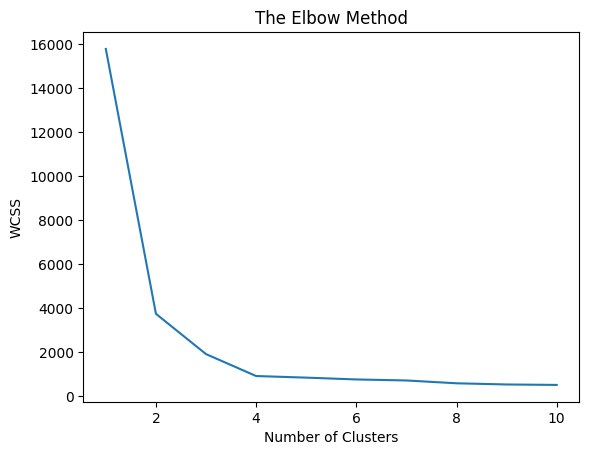

In [8]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i, 
        init='k-means++', 
        random_state=0,
        n_init='auto'
    )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [9]:
#with the help of silhoutee  we need validate k=4 is validate or not
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=0, n_init='auto')
    labels = km.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"k={k}  Silhouette Score = {score:.3f}")
 

k=2  Silhouette Score = 0.705
k=3  Silhouette Score = 0.588
k=4  Silhouette Score = 0.651
k=5  Silhouette Score = 0.556
k=6  Silhouette Score = 0.441
k=7  Silhouette Score = 0.441
k=8  Silhouette Score = 0.332
k=9  Silhouette Score = 0.335
k=10  Silhouette Score = 0.325


c:\Users\mehsa\anaconda3\envs\nlp\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\mehsa\anaconda3\envs\nlp\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\mehsa\anaconda3\envs\nlp\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\mehsa\anaconda3\envs\nlp\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is k